In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv("loan_prediction.csv")

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df['Loan_ID']=le.fit_transform(df["Loan_ID"])
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])

In [25]:
df["Dependents"]=le.fit_transform(df["Dependents"])

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [27]:
from sklearn.preprocessing import MinMaxScaler


In [28]:
mms=MinMaxScaler()

In [29]:
mms.fit_transform(df)

array([[0.        , 0.5       , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00163132, 0.5       , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.00326264, 0.5       , 0.5       , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99673736, 0.5       , 0.5       , ..., 1.        , 1.        ,
        1.        ],
       [0.99836868, 0.5       , 0.5       , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [30]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
df.shape

(614, 13)

In [34]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
Applicant Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   Applicant Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit History     564 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [36]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.000764,-0.022294,0.058833,0.029260,0.037092,0.019396,-0.014656,0.034174,-0.004143,-0.036800,-0.168367,0.024885
Gender,-0.000764,1.000000,0.330988,0.179846,0.032770,-0.036017,0.091801,0.130529,0.138067,-0.080620,-0.004971,-0.019791,0.033272
Married,-0.022294,0.330988,1.000000,0.354413,0.009407,-0.036041,0.051737,0.110537,0.172137,-0.089838,0.013366,0.022623,0.098600
Dependents,0.058833,0.179846,0.354413,1.000000,0.040694,-0.004980,0.106932,-0.019422,0.158508,-0.054452,-0.082853,0.040056,0.008312
Education,0.029260,0.032770,0.009407,0.040694,1.000000,0.013549,-0.132015,-0.060520,-0.169390,-0.080910,-0.064098,-0.078661,-0.078434
Self_Employed,0.037092,-0.036017,-0.036041,-0.004980,0.013549,1.000000,0.110006,-0.019479,0.064810,-0.039429,0.050234,-0.066773,0.039210
Applicant Income,0.019396,0.091801,0.051737,0.106932,-0.132015,0.110006,1.000000,-0.122631,0.570708,-0.062861,-0.023779,-0.004920,-0.006281
CoapplicantIncome,-0.014656,0.130529,0.110537,-0.019422,-0.060520,-0.019479,-0.122631,1.000000,0.159152,-0.000290,-0.010847,-0.007900,-0.043353
Loan_Amount,0.034174,0.138067,0.172137,0.158508,-0.169390,0.064810,0.570708,0.159152,1.000000,0.023239,-0.018156,-0.074084,-0.036642
Loan_Amount_Term,-0.004143,-0.080620,-0.089838,-0.054452,-0.080910,-0.039429,-0.062861,-0.000290,0.023239,1.000000,0.008658,-0.072168,-0.028601


<AxesSubplot:>

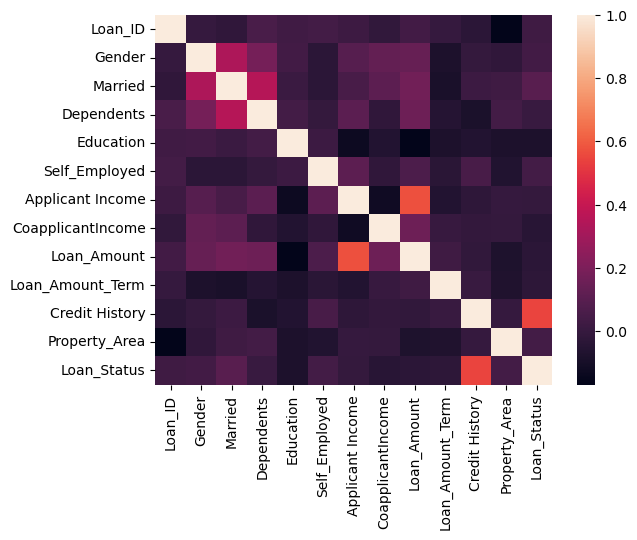

In [40]:
sns.heatmap(df.corr())

Ne negative correlation of loan_status with any columns 

In [41]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,309.540643,0.843100,0.648393,0.854442,0.204159,0.226843,5507.822306,1542.394934,145.852552,342.351607,0.850662,1.018904,0.691871
std,177.049788,0.421885,0.485785,1.121241,0.403467,0.520014,6404.132369,2524.295797,84.108409,64.861662,0.356759,0.778269,0.462157
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,159.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3816.000000,1086.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,463.000000,1.000000,1.000000,2.000000,0.000000,0.000000,5815.000000,2232.000000,167.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max

In [42]:
df.skew()

Loan_ID             -0.008951
Gender              -0.929715
Married             -0.523602
Dependents           1.041856
Education            1.472060
Self_Employed        2.253188
Applicant Income     6.470833
CoapplicantIncome    5.991453
Loan_Amount          2.607945
Loan_Amount_Term    -2.275361
Credit History      -1.973278
Property_Area       -0.032829
Loan_Status         -0.833481
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='

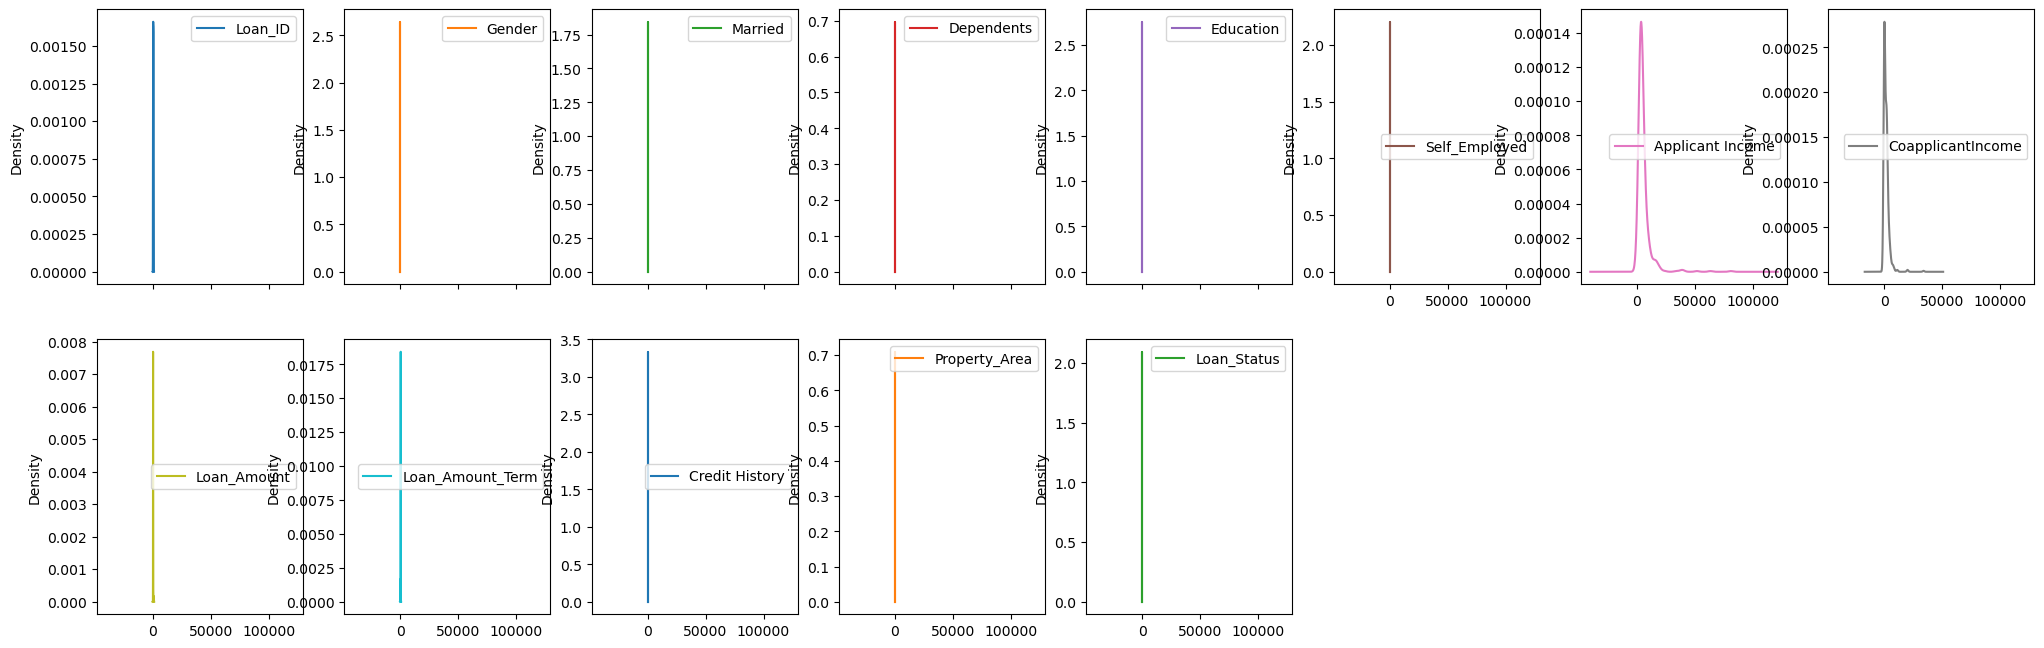

In [44]:
df.plot(kind="kde",subplots=True,layout=(6,8),figsize=(25,25))

<AxesSubplot:xlabel='Applicant Income', ylabel='Density'>

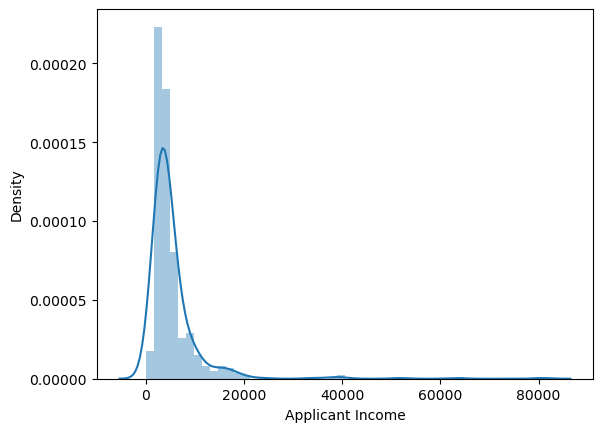

In [46]:
sns.distplot(df["Applicant Income"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

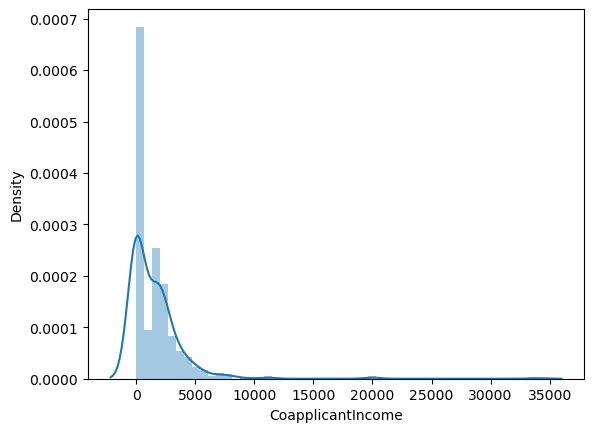

In [47]:
sns.distplot(df["CoapplicantIncome"])

No skewness is present in dataset(df)

Loan_ID                  AxesSubplot(0.125,0.77;0.0824468x0.11)
Gender                AxesSubplot(0.223936,0.77;0.0824468x0.11)
Married               AxesSubplot(0.322872,0.77;0.0824468x0.11)
Dependents            AxesSubplot(0.421809,0.77;0.0824468x0.11)
Education             AxesSubplot(0.520745,0.77;0.0824468x0.11)
Self_Employed         AxesSubplot(0.619681,0.77;0.0824468x0.11)
Applicant Income      AxesSubplot(0.718617,0.77;0.0824468x0.11)
CoapplicantIncome     AxesSubplot(0.817553,0.77;0.0824468x0.11)
Loan_Amount             AxesSubplot(0.125,0.638;0.0824468x0.11)
Loan_Amount_Term     AxesSubplot(0.223936,0.638;0.0824468x0.11)
Credit History       AxesSubplot(0.322872,0.638;0.0824468x0.11)
Property_Area        AxesSubplot(0.421809,0.638;0.0824468x0.11)
Loan_Status          AxesSubplot(0.520745,0.638;0.0824468x0.11)
dtype: object

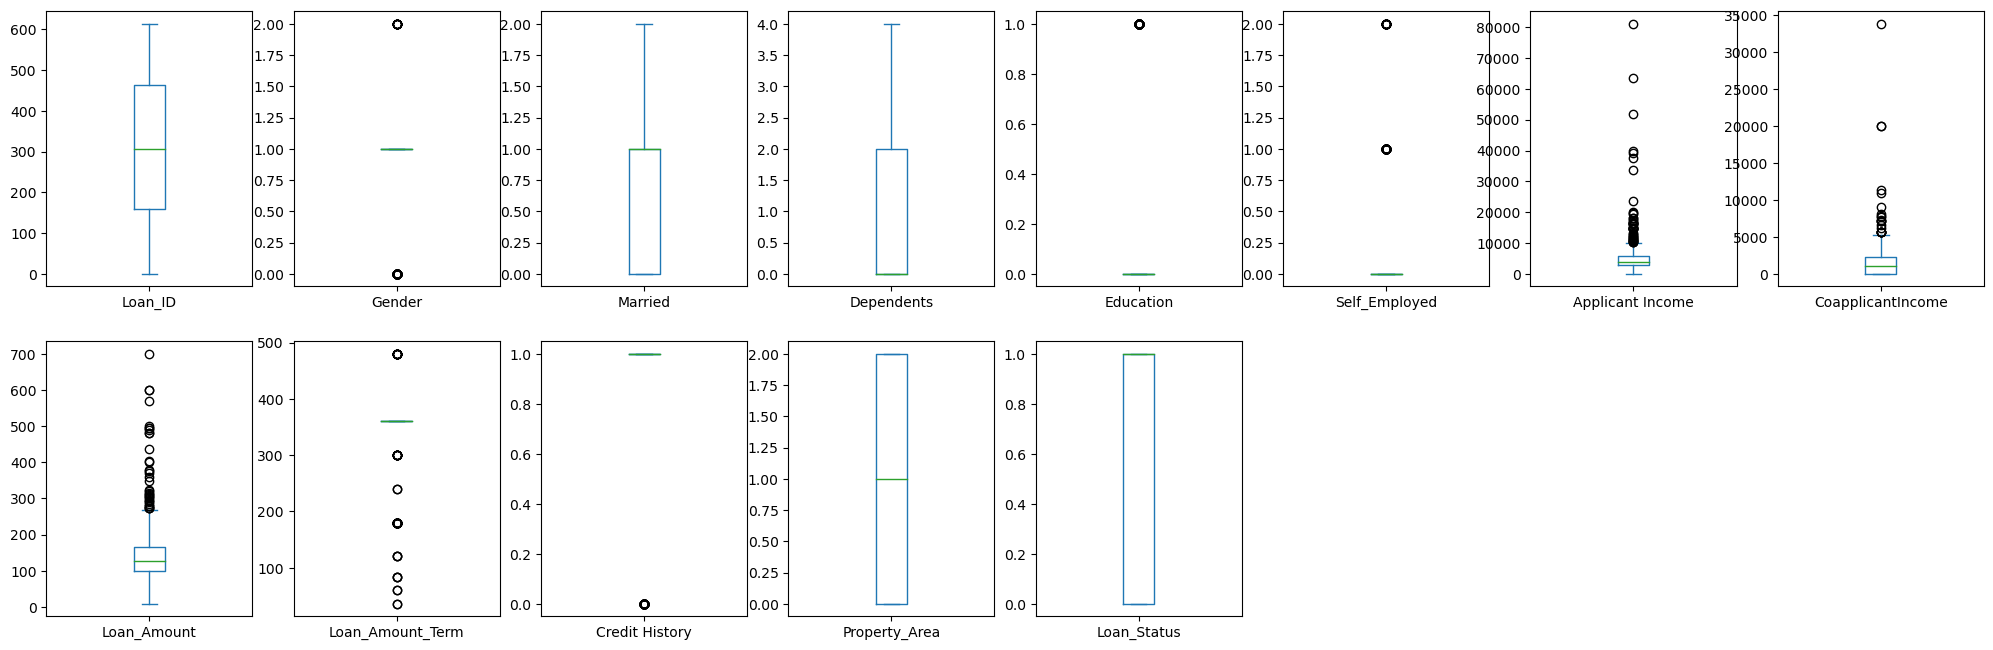

In [48]:
df.plot(kind="box",subplots=True,layout=(6,8),figsize=(25,25))

from this above visualization we get to know that outliers are present in dataset

In [49]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(df))

In [51]:
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
1,1.744327,0.372253,0.724476,0.129941,0.506490,0.436638,0.144547,0.013638,0.212457,0.272350,0.418994,1.310431,1.498465
2,1.738673,0.372253,0.724476,0.762772,0.506490,1.488208,0.391965,0.611598,0.950299,0.272350,0.418994,1.261807,0.667349
3,1.733020,0.372253,0.724476,0.762772,1.974373,0.436638,0.457141,0.323408,0.307663,0.272350,0.418994,1.261807,0.667349
4,1.727366,0.372253,1.335996,0.762772,0.506490,0.436638,0.076926,0.611598,0.057749,0.272350,0.418994,1.261807,0.667349
5,1.721713,0.372253,0.724476,1.022654,0.506490,1.488208,0.014195,1.052221,1.441736,0.272350,0.418994,1.261807,0.667349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.692986,2.000302,1.335996,0.762772,0.506490,0.436638,0.407595,0.611598,0.890796,0.272350,0.418994,1.310431,0.667349
610,1.698639,0.372253,0.724476,1.915367,0.506490,0.436638,0.219101,0.611598,1.259716,2.505413,0.418994,1.310431,0.667349
611,1.704293,0.372253,0.724476,0.129941,0.506490,0.436638,0.400773,0.516432,1.275127,0.272350,0.418994,1.261807,0.667349
612,1.709946,0.372253,0.724476,1.022654,0.506490,0.436638,0.324344,0.611598,0.489682,0.272350,0.418994,1.261807,0.667349


In [52]:
threashold=3
print(np.where(z>3))

(array([  8,  10,  13,  25,  57,  78,  88,  92,  93, 107, 129, 129, 131,
       142, 143, 143, 149, 149, 154, 156, 185, 196, 204, 222, 228, 238,
       253, 265, 284, 284, 284, 286, 293, 315, 320, 325, 330, 344, 351,
       358, 371, 371, 380, 383, 396, 401, 418, 424, 449, 450, 458, 465,
       468, 480, 493, 497, 499, 502, 517, 520], dtype=int64), array([7, 5, 9, 5, 9, 9, 5, 5, 5, 9, 6, 8, 5, 5, 6, 8, 7, 8, 6, 6, 5, 5,
       9, 9, 5, 8, 5, 8, 5, 6, 8, 5, 5, 8, 5, 5, 5, 7, 6, 7, 5, 8, 6, 5,
       5, 5, 8, 9, 8, 8, 5, 5, 9, 8, 9, 5, 7, 9, 5, 8], dtype=int64))


In [53]:
df_n=df[(z<3).all(axis=1)]

In [54]:
df_n

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [55]:
df=df_n

In [56]:
df.shape

(475, 13)

In [57]:
x=df.drop("Loan_Status",axis=1)

In [58]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [59]:
y=df["Loan_Status"]

In [113]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 475, dtype: int32

In [159]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.35,random_state=46)

In [98]:
lg=LogisticRegression()

In [99]:
lg

LogisticRegression()

In [100]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [101]:
lpred=lg.predict(xtest)

In [102]:
print("Accuracy score",accuracy_score(ytest,lpred))
print("confusion matrix",confusion_matrix(ytest,lpred))
print("Classification report",classification_report(ytest,lpred))

Accuracy score 0.8951048951048951
confusion matrix [[ 23  14]
 [  1 105]]
Classification report               precision    recall  f1-score   support

           0       0.96      0.62      0.75        37
           1       0.88      0.99      0.93       106

    accuracy                           0.90       143
   macro avg       0.92      0.81      0.84       143
weighted avg       0.90      0.90      0.89       143



In [166]:
p=np.array([1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0])

In [167]:
p=p.reshape(1,-1)

In [168]:
lg.predict(p)

array([1])

In [169]:
svc=SVC()

In [170]:
svc.fit(xtrain,ytrain)

SVC()

In [171]:
spred=svc.predict(xtest)

In [172]:
print("Accuracy score",accuracy_score(ytest,spred))
print("confusion matrix",confusion_matrix(ytest,spred))
print("Classification report",classification_report(ytest,spred))

Accuracy score 0.7305389221556886
confusion matrix [[  0  45]
 [  0 122]]
Classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.73      1.00      0.84       122

    accuracy                           0.73       167
   macro avg       0.37      0.50      0.42       167
weighted avg       0.53      0.73      0.62       167



In [173]:
svc.predict(p)

array([1])